# Ensemble : Bagging

## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)


In [2]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


## 2.데이터 준비

### (1) 데이터 정리

In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [4]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

## 3.모델링 : 랜덤포레스트


In [7]:
# 모델 선언
model = RandomForestClassifier(n_estimators = 5, max_depth = 3)

In [8]:
# 학습
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [9]:
# 예측
pred = model.predict(x_val)

In [10]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       769
           1       0.63      0.57      0.59       731

    accuracy                           0.62      1500
   macro avg       0.62      0.62      0.62      1500
weighted avg       0.62      0.62      0.62      1500



## 4.시각화와 변수중요도

### (1) 모델의 내부를 살펴봅시다.

In [11]:
# 5개 decision tree
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1603519023),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=561641518),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=713888709),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=426245959),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=213162344)]

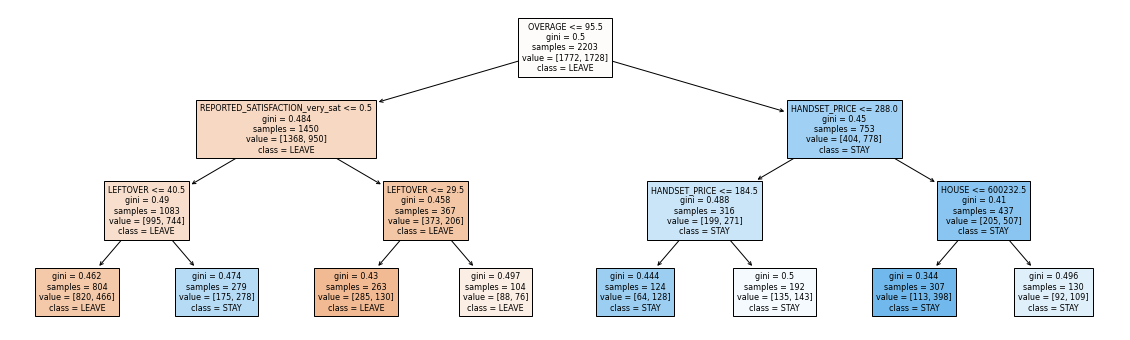

In [12]:
# 각 트리별로 시각화 할 수 있다.
plt.figure(figsize=(20,6))
plot_tree(model.estimators_[0], 
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'], 
               filled = True, fontsize = 8);

### (2) 변수 중요도

In [13]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.         0.07939565 0.37064258 0.21089302 0.05594314 0.06167445
 0.13098126 0.06463621 0.00460158 0.         0.00499604 0.
 0.         0.0055942  0.         0.         0.00173714 0.
 0.0067833  0.00212144]


* 변수중요도 그래프 그리기 함수 만들기

In [14]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

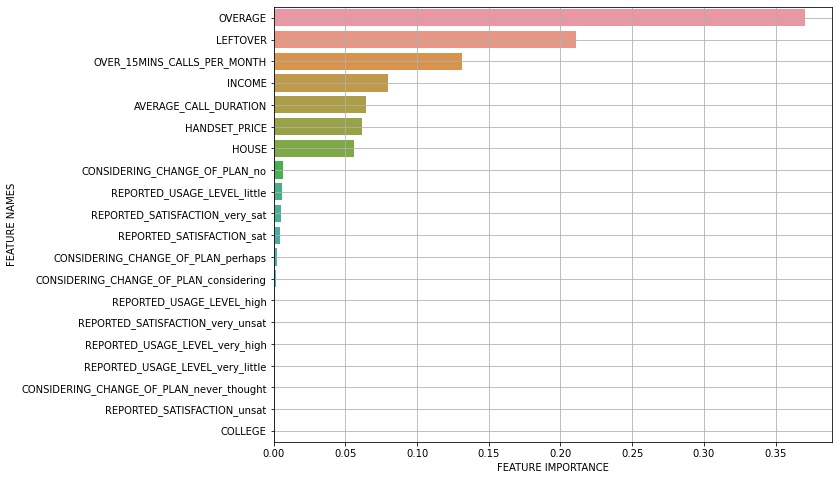

In [15]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)

## 5.실습: random forest 튜닝

* grid search를 수행합니다.
    * ① n_estimators 의 갯수를 5 ~ 200까지 5개씩 증가시켜가며 튜닝해 봅시다.
    * ② max_features를 1 ~ feature갯수까지 1씩 증가시켜가며 튜닝해 봅시다.
    * ③ n_estimators, max_features를 동시에 튜닝.

* 모델링 후 cv 평가 결과를 차트로 그려봅시다. 
* 튜닝된 모델로 부터 변수중요도를 뽑아 봅시다.


### (1) n_estimators 튜닝

In [16]:
params = {'n_estimators': range(5,201,5)}


In [17]:
m = RandomForestClassifier()
m_gs1 = GridSearchCV(m,params,cv=5)

In [18]:
m_gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(5, 201, 5)})

In [19]:
m_gs1.best_params_,m_gs1.best_score_

({'n_estimators': 160}, 0.69)

In [20]:
p1 = m_gs1.predict(x_val)
print(classification_report(y_val,p1))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       769
           1       0.71      0.70      0.70       731

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



- 튜닝 결과를 그래프로

In [21]:
# 튜닝 결과를 데이터프레임으로 저장
result = pd.DataFrame(m_gs1.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044449,0.007971,0.006050,0.001666,5,{'n_estimators': 5},0.634286,0.680000,0.611429,0.638571,0.621429,0.637143,0.023474,40
1,0.078572,0.005672,0.009081,0.004941,10,{'n_estimators': 10},0.631429,0.660000,0.678571,0.657143,0.658571,0.657143,0.015037,39
2,0.122490,0.002993,0.010312,0.003504,15,{'n_estimators': 15},0.641429,0.680000,0.674286,0.665714,0.671429,0.666571,0.013389,38
3,0.156466,0.010795,0.010484,0.001179,20,{'n_estimators': 20},0.632857,0.684286,0.678571,0.678571,0.682857,0.671429,0.019420,35
4,0.247137,0.041798,0.016376,0.004302,25,{'n_estimators': 25},0.655714,0.695714,0.651429,0.661429,0.684286,0.669714,0.017247,36


In [22]:
temp = result.loc[:,['param_n_estimators','mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,5,0.637143
1,10,0.657143
2,15,0.666571
3,20,0.671429
4,25,0.669714


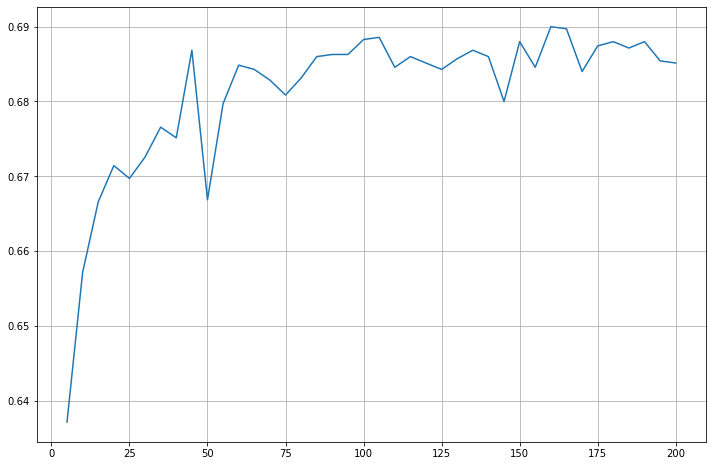

In [23]:
plt.figure(figsize=(12,8))
plt.plot('param_n_estimators','mean_test_score',data=temp)
plt.grid()
plt.show()

### (2) max_features 튜닝

In [24]:
x_train.shape

(3500, 20)

In [33]:
# 1~20
params = {'max_features':range(1,21)}
params

{'max_features': range(1, 21)}

In [35]:
# 기본모델
m = RandomForestClassifier()
# 그리드서치 모델 선언

m_gs = GridSearchCV(m,params, cv = 5,verbose=3)

# m_gs = GridSearchCV(RandomForestClassifier(),params,cv=5)

In [36]:
# 튜닝
m_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................................max_features=1; total time=   0.7s
[CV 2/5] END .................................max_features=1; total time=   0.6s
[CV 3/5] END .................................max_features=1; total time=   0.5s
[CV 4/5] END .................................max_features=1; total time=   0.5s
[CV 5/5] END .................................max_features=1; total time=   0.5s
[CV 1/5] END .................................max_features=2; total time=   0.6s
[CV 2/5] END .................................max_features=2; total time=   0.5s
[CV 3/5] END .................................max_features=2; total time=   0.5s
[CV 4/5] END .................................max_features=2; total time=   0.6s
[CV 5/5] END .................................max_features=2; total time=   0.5s
[CV 1/5] END .................................max_features=3; total time=   0.6s
[CV 2/5] END .................................m

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21)}, verbose=3)

In [42]:
m_gs.best_params_,m_gs.best_score_

({'max_features': 8}, 0.6871428571428572)

In [43]:
p1 = m_gs.predict(x_val)
print(classification_report(y_val,p1))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       769
           1       0.71      0.71      0.71       731

    accuracy                           0.72      1500
   macro avg       0.72      0.72      0.72      1500
weighted avg       0.72      0.72      0.72      1500



In [46]:
# 튜닝 결과를 데이터프레임으로 저장
result = pd.DataFrame(m_gs.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.611655,0.050336,0.047820,0.008043,1,{'max_features': 1},0.635714,0.667143,0.662857,0.648571,0.668571,0.656571,0.012604,20
1,0.620442,0.043452,0.039058,0.005534,2,{'max_features': 2},0.657143,0.705714,0.662857,0.665714,0.697143,0.677714,0.019745,12
2,0.953641,0.219735,0.077148,0.022083,3,{'max_features': 3},0.652857,0.704286,0.692857,0.682857,0.687143,0.684000,0.017152,2
3,1.550530,0.543219,0.112173,0.050354,4,{'max_features': 4},0.655714,0.698571,0.675714,0.684286,0.684286,0.679714,0.014067,8
4,1.220110,0.362458,0.062324,0.030375,5,{'max_features': 5},0.668571,0.698571,0.677143,0.674286,0.688571,0.681429,0.010767,5


In [48]:
temp = result.loc[:, ['param_max_features', 'mean_test_score']]
temp.head()

,param_max_features,mean_test_score
0,1,0.656571
1,2,0.677714
2,3,0.684000
3,4,0.679714
4,5,0.681429


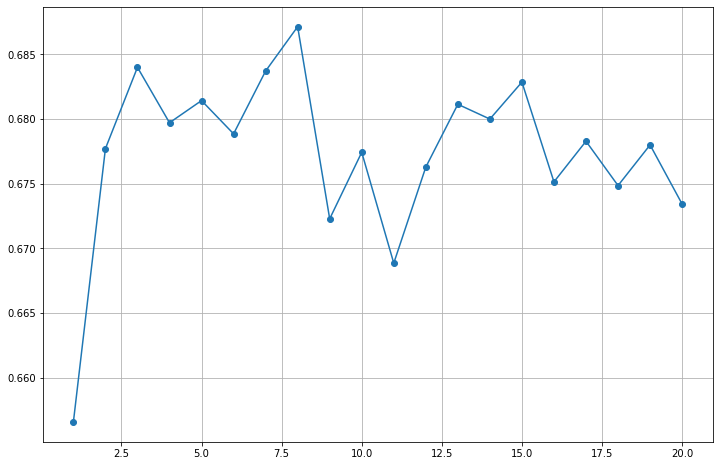

In [49]:
plt.figure(figsize = (12,8))
plt.plot('param_max_features', 'mean_test_score', data = temp,marker='o')
plt.grid()
plt.show()

* 변수 중요도

### (3) n_estimators와 max_features를 한꺼번에 튜닝

In [54]:
params = {'n_estimators': range(5,201,20),'max_features':range(1,21)}
params

{'n_estimators': range(5, 201, 20), 'max_features': range(1, 21)}

In [55]:
m3 = RandomForestClassifier()

m_gs3 = GridSearchCV(m3,params,cv=5,verbose=3)

In [56]:
m_gs3.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END .................max_features=1, n_estimators=5; total time=   0.0s
[CV 2/5] END .................max_features=1, n_estimators=5; total time=   0.0s
[CV 3/5] END .................max_features=1, n_estimators=5; total time=   0.0s
[CV 4/5] END .................max_features=1, n_estimators=5; total time=   0.0s
[CV 5/5] END .................max_features=1, n_estimators=5; total time=   0.0s
[CV 1/5] END ................max_features=1, n_estimators=25; total time=   0.0s
[CV 2/5] END ................max_features=1, n_estimators=25; total time=   0.0s
[CV 3/5] END ................max_features=1, n_estimators=25; total time=   0.0s
[CV 4/5] END ................max_features=1, n_estimators=25; total time=   0.0s
[CV 5/5] END ................max_features=1, n_estimators=25; total time=   0.0s
[CV 1/5] END ................max_features=1, n_estimators=45; total time=   0.1s
[CV 2/5] END ................max_features=1, 

[CV 1/5] END ................max_features=3, n_estimators=25; total time=   0.1s
[CV 2/5] END ................max_features=3, n_estimators=25; total time=   0.1s
[CV 3/5] END ................max_features=3, n_estimators=25; total time=   0.1s
[CV 4/5] END ................max_features=3, n_estimators=25; total time=   0.1s
[CV 5/5] END ................max_features=3, n_estimators=25; total time=   0.1s
[CV 1/5] END ................max_features=3, n_estimators=45; total time=   0.2s
[CV 2/5] END ................max_features=3, n_estimators=45; total time=   0.2s
[CV 3/5] END ................max_features=3, n_estimators=45; total time=   0.2s
[CV 4/5] END ................max_features=3, n_estimators=45; total time=   0.2s
[CV 5/5] END ................max_features=3, n_estimators=45; total time=   0.1s
[CV 1/5] END ................max_features=3, n_estimators=65; total time=   0.3s
[CV 2/5] END ................max_features=3, n_estimators=65; total time=   0.3s
[CV 3/5] END ...............

[CV 4/5] END ................max_features=5, n_estimators=25; total time=   0.1s
[CV 5/5] END ................max_features=5, n_estimators=25; total time=   0.1s
[CV 1/5] END ................max_features=5, n_estimators=45; total time=   0.3s
[CV 2/5] END ................max_features=5, n_estimators=45; total time=   0.3s
[CV 3/5] END ................max_features=5, n_estimators=45; total time=   0.3s
[CV 4/5] END ................max_features=5, n_estimators=45; total time=   0.3s
[CV 5/5] END ................max_features=5, n_estimators=45; total time=   0.3s
[CV 1/5] END ................max_features=5, n_estimators=65; total time=   0.4s
[CV 2/5] END ................max_features=5, n_estimators=65; total time=   0.5s
[CV 3/5] END ................max_features=5, n_estimators=65; total time=   0.5s
[CV 4/5] END ................max_features=5, n_estimators=65; total time=   0.5s
[CV 5/5] END ................max_features=5, n_estimators=65; total time=   0.4s
[CV 1/5] END ...............

[CV 1/5] END ................max_features=7, n_estimators=45; total time=   0.4s
[CV 2/5] END ................max_features=7, n_estimators=45; total time=   0.6s
[CV 3/5] END ................max_features=7, n_estimators=45; total time=   0.5s
[CV 4/5] END ................max_features=7, n_estimators=45; total time=   0.4s
[CV 5/5] END ................max_features=7, n_estimators=45; total time=   0.6s
[CV 1/5] END ................max_features=7, n_estimators=65; total time=   0.6s
[CV 2/5] END ................max_features=7, n_estimators=65; total time=   0.6s
[CV 3/5] END ................max_features=7, n_estimators=65; total time=   0.6s
[CV 4/5] END ................max_features=7, n_estimators=65; total time=   0.7s
[CV 5/5] END ................max_features=7, n_estimators=65; total time=   0.6s
[CV 1/5] END ................max_features=7, n_estimators=85; total time=   0.9s
[CV 2/5] END ................max_features=7, n_estimators=85; total time=   1.0s
[CV 3/5] END ...............

[CV 3/5] END ................max_features=9, n_estimators=45; total time=   0.4s
[CV 4/5] END ................max_features=9, n_estimators=45; total time=   0.5s
[CV 5/5] END ................max_features=9, n_estimators=45; total time=   0.4s
[CV 1/5] END ................max_features=9, n_estimators=65; total time=   0.6s
[CV 2/5] END ................max_features=9, n_estimators=65; total time=   0.6s
[CV 3/5] END ................max_features=9, n_estimators=65; total time=   0.6s
[CV 4/5] END ................max_features=9, n_estimators=65; total time=   0.6s
[CV 5/5] END ................max_features=9, n_estimators=65; total time=   0.6s
[CV 1/5] END ................max_features=9, n_estimators=85; total time=   0.8s
[CV 2/5] END ................max_features=9, n_estimators=85; total time=   0.8s
[CV 3/5] END ................max_features=9, n_estimators=85; total time=   0.8s
[CV 4/5] END ................max_features=9, n_estimators=85; total time=   0.9s
[CV 5/5] END ...............

[CV 5/5] END ...............max_features=11, n_estimators=45; total time=   1.0s
[CV 1/5] END ...............max_features=11, n_estimators=65; total time=   1.0s
[CV 2/5] END ...............max_features=11, n_estimators=65; total time=   1.2s
[CV 3/5] END ...............max_features=11, n_estimators=65; total time=   1.1s
[CV 4/5] END ...............max_features=11, n_estimators=65; total time=   0.8s
[CV 5/5] END ...............max_features=11, n_estimators=65; total time=   0.8s
[CV 1/5] END ...............max_features=11, n_estimators=85; total time=   0.9s
[CV 2/5] END ...............max_features=11, n_estimators=85; total time=   0.9s
[CV 3/5] END ...............max_features=11, n_estimators=85; total time=   0.9s
[CV 4/5] END ...............max_features=11, n_estimators=85; total time=   1.0s
[CV 5/5] END ...............max_features=11, n_estimators=85; total time=   1.1s
[CV 1/5] END ..............max_features=11, n_estimators=105; total time=   1.3s
[CV 2/5] END ..............m

[CV 2/5] END ...............max_features=13, n_estimators=65; total time=   1.1s
[CV 3/5] END ...............max_features=13, n_estimators=65; total time=   1.2s
[CV 4/5] END ...............max_features=13, n_estimators=65; total time=   1.0s
[CV 5/5] END ...............max_features=13, n_estimators=65; total time=   0.9s
[CV 1/5] END ...............max_features=13, n_estimators=85; total time=   1.3s
[CV 2/5] END ...............max_features=13, n_estimators=85; total time=   3.5s
[CV 3/5] END ...............max_features=13, n_estimators=85; total time=   1.5s
[CV 4/5] END ...............max_features=13, n_estimators=85; total time=   2.0s
[CV 5/5] END ...............max_features=13, n_estimators=85; total time=   1.7s
[CV 1/5] END ..............max_features=13, n_estimators=105; total time=   1.3s
[CV 2/5] END ..............max_features=13, n_estimators=105; total time=   1.7s
[CV 3/5] END ..............max_features=13, n_estimators=105; total time=   1.2s
[CV 4/5] END ..............m

[CV 4/5] END ...............max_features=15, n_estimators=65; total time=   1.3s
[CV 5/5] END ...............max_features=15, n_estimators=65; total time=   1.2s
[CV 1/5] END ...............max_features=15, n_estimators=85; total time=   1.3s
[CV 2/5] END ...............max_features=15, n_estimators=85; total time=   1.2s
[CV 3/5] END ...............max_features=15, n_estimators=85; total time=   1.1s
[CV 4/5] END ...............max_features=15, n_estimators=85; total time=   1.2s
[CV 5/5] END ...............max_features=15, n_estimators=85; total time=   1.1s
[CV 1/5] END ..............max_features=15, n_estimators=105; total time=   1.3s
[CV 2/5] END ..............max_features=15, n_estimators=105; total time=   1.5s
[CV 3/5] END ..............max_features=15, n_estimators=105; total time=   1.4s
[CV 4/5] END ..............max_features=15, n_estimators=105; total time=   1.4s
[CV 5/5] END ..............max_features=15, n_estimators=105; total time=   1.3s
[CV 1/5] END ..............m

[CV 1/5] END ...............max_features=17, n_estimators=85; total time=   1.3s
[CV 2/5] END ...............max_features=17, n_estimators=85; total time=   1.4s
[CV 3/5] END ...............max_features=17, n_estimators=85; total time=   1.4s
[CV 4/5] END ...............max_features=17, n_estimators=85; total time=   1.3s
[CV 5/5] END ...............max_features=17, n_estimators=85; total time=   1.3s
[CV 1/5] END ..............max_features=17, n_estimators=105; total time=   1.8s
[CV 2/5] END ..............max_features=17, n_estimators=105; total time=   1.7s
[CV 3/5] END ..............max_features=17, n_estimators=105; total time=   1.8s
[CV 4/5] END ..............max_features=17, n_estimators=105; total time=   1.7s
[CV 5/5] END ..............max_features=17, n_estimators=105; total time=   1.7s
[CV 1/5] END ..............max_features=17, n_estimators=125; total time=   1.9s
[CV 2/5] END ..............max_features=17, n_estimators=125; total time=   2.0s
[CV 3/5] END ..............m

[CV 3/5] END ...............max_features=19, n_estimators=85; total time=   1.3s
[CV 4/5] END ...............max_features=19, n_estimators=85; total time=   1.3s
[CV 5/5] END ...............max_features=19, n_estimators=85; total time=   1.3s
[CV 1/5] END ..............max_features=19, n_estimators=105; total time=   1.6s
[CV 2/5] END ..............max_features=19, n_estimators=105; total time=   1.6s
[CV 3/5] END ..............max_features=19, n_estimators=105; total time=   1.7s
[CV 4/5] END ..............max_features=19, n_estimators=105; total time=   1.7s
[CV 5/5] END ..............max_features=19, n_estimators=105; total time=   1.9s
[CV 1/5] END ..............max_features=19, n_estimators=125; total time=   2.3s
[CV 2/5] END ..............max_features=19, n_estimators=125; total time=   2.2s
[CV 3/5] END ..............max_features=19, n_estimators=125; total time=   2.3s
[CV 4/5] END ..............max_features=19, n_estimators=125; total time=   2.4s
[CV 5/5] END ..............m

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(1, 21),
                         'n_estimators': range(5, 201, 20)},
             verbose=3)

In [58]:
m_gs3.best_params_,m_gs3.best_score_

({'max_features': 6, 'n_estimators': 145}, 0.6917142857142857)

In [59]:
p3 = m_gs3.predict(x_val)
print(classification_report(y_val,p3))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       769
           1       0.70      0.72      0.71       731

    accuracy                           0.72      1500
   macro avg       0.72      0.72      0.72      1500
weighted avg       0.72      0.72      0.72      1500



In [60]:
result = pd.DataFrame(m_gs3.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031190,0.006515,0.007037,0.002615,1,5,"{'max_features': 1, 'n_estimators': 5}",0.577143,0.584286,0.572857,0.598571,0.582857,0.583143,0.008732,200
1,0.114344,0.005184,0.010582,0.000825,1,25,"{'max_features': 1, 'n_estimators': 25}",0.627143,0.640000,0.657143,0.634286,0.657143,0.643143,0.012135,189
2,0.201981,0.008565,0.018006,0.002572,1,45,"{'max_features': 1, 'n_estimators': 45}",0.642857,0.652857,0.640000,0.644286,0.664286,0.648857,0.008825,184
3,0.279393,0.019213,0.022845,0.002240,1,65,"{'max_features': 1, 'n_estimators': 65}",0.631429,0.647143,0.647143,0.662857,0.671429,0.652000,0.013898,181
4,0.398670,0.031518,0.029239,0.002242,1,85,"{'max_features': 1, 'n_estimators': 85}",0.642857,0.668571,0.660000,0.657143,0.687143,0.663143,0.014580,173


In [61]:
temp = result[['param_n_estimators','param_max_features','mean_test_score']]
temp.head()

,param_n_estimators,param_max_features,mean_test_score
0,5,1,0.583143
1,25,1,0.643143
2,45,1,0.648857
3,65,1,0.652000
4,85,1,0.663143


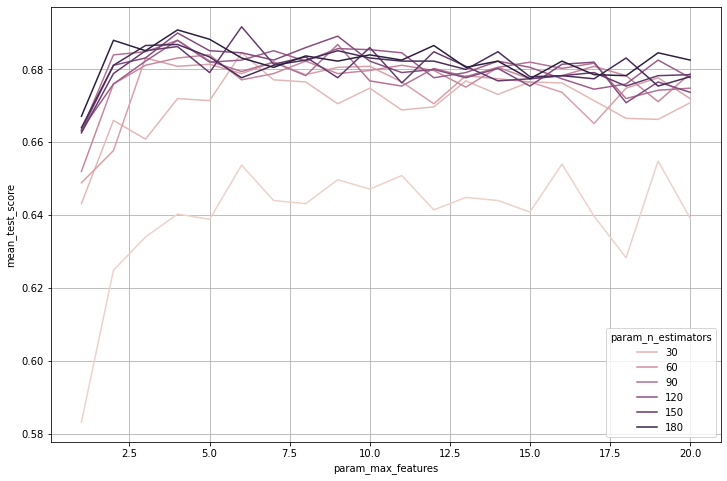

In [62]:
plt.figure(figsize=(12,8))
sns.lineplot(x='param_max_features',y='mean_test_score',data=temp,hue='param_n_estimators')
plt.grid()
plt.show()